LABORATORIO 1 -  HINEILL DAVID CÉSPEDES ESPINOZA - 20213704

Pregunta 1 (6 ptos.):
En el presente ejercicio se explorar´a la de recuperaci´on de se˜nales utilizando
bancos de filtros pasa bajo y pasa alto. El enfoque se centrar´a en c´omo la convoluci
´on de se˜nales, junto con sistemas de interpolaci´on y decimaci´on, permite
la reconstrucci´on de se˜nales a partir de sus componentes filtrados. Para ilustrar
este proceso, se desarrollar´a un programa que realice lo siguiente:

a) (Tarea as´ıncrona) Generar una se˜nal X, monocomponente, cuya frecuencia
var´ıa linealmente desde 0,1 a 0,4 en frecuencia normalizada (donde 0.5
representa la frecuencia de Nyquist). Su amplitud tambi´en var´ıa linealmente
desde 0 a 1. Mostrar la se˜nal y su espectro en frecuencia normalizada.
Comentar.

In [35]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

Text(0, 0.5, 'Magnitud')

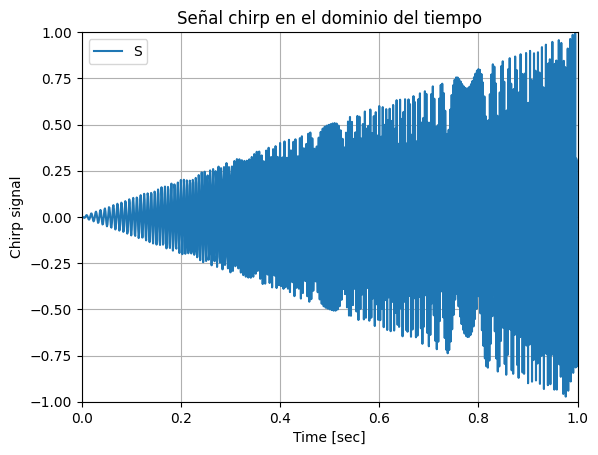

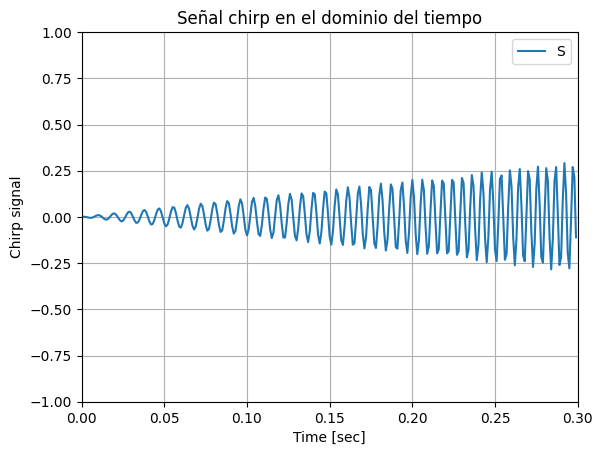

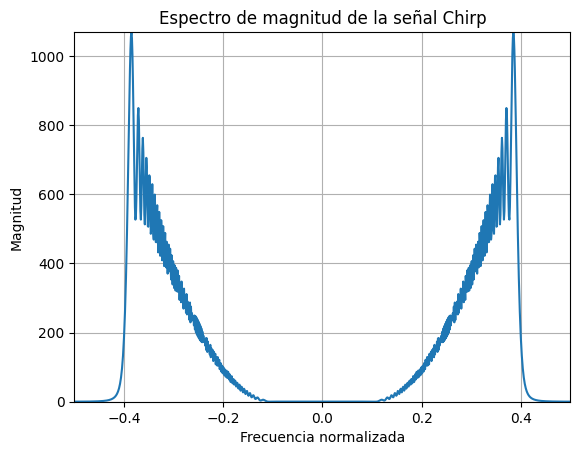

In [36]:
fs = 1e3 #Frecuencia de muestreo variable
f_ini = 0.1*fs #Frecuencia inicial
f_end = 0.4*fs #Frecuencia final
A_ini = 0 #Amplitud inicial 
A_end = 1 #Amplitud final
#Por el contexto del problema se puede entender que la frecuencia normalizada es respecto a la frecuencia de muestreo
# fNyquist = fs/2
# si fNyquist= 0.5 entonces fs = 1 
t = np.arange(A_ini,A_end,1/fs)
signal = t*chirp(t, f0=f_ini, f1=f_end, t1=1, method='linear') #Hacemos que la frecuencia esté cambiando de acuerdo a lo indicado 
#------------PLOTEAMOS LA SEÑAL EN EL TIEMPO
plt.figure(1)
plt.plot(t,signal)
plt.xlim([0,1])
plt.ylim([-1,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal') #Chirp es una señal usada en la que se varía la frecuencia a medida de que el tiempo avanza
plt.title('Señal chirp en el dominio del tiempo')
plt.legend('Señal')

#PARA OBSERVAR MEJOR COMO EVOLUCIONA LA GRÁFICA
plt.figure(2)
plt.plot(t[:300],signal[:300])
plt.xlim([0,t[300]])
plt.ylim([-1,1])
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Chirp signal') #Chirp es una señal usada en la que se varía la frecuencia a medida de que el tiempo avanza
plt.title('Señal chirp en el dominio del tiempo')
plt.legend('Señal')


#---------------CALCULAMOS LA TRANSFORMADA DE FOURIER Y LA PLOTEAMOS NORMALIZADA
fft_signal = np.fft.fftshift(np.fft.fft(signal)) #Calculamos la tranformada de fourier
spc = np.abs(fft_signal)**2 #Obtenemos el cuadrado de la magnitud del espectro 
Ns= len(signal)
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/(fs) #Graficamos normalizando
plt.figure(3)
plt.plot(freq, spc)
plt.xlim([-0.5,0.5])
plt.grid('on')
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de magnitud de la señal Chirp")
plt.ylim([0,np.max(spc)])
plt.ylabel("Magnitud")

Respuesta a) : Se generó una señal en la que se varía la amplitud y la frecuencia linealmente a medida de que se avanza en el tiempo , para generar esta señal se uso la librería scipy que nos brinda diversas formas de generar señales , como es el caso de una función chirp que cumple con la condición de tener frecuencia que aumenta a medida de que avanza el tiempo. Se genero teniendo en cuenta que fs era el equivalente a 1 (como referencia) para el rango de frecuencia que iba a barrer la función Chirp. Al plotear podemos observar como sí se cumplen las propiedades antes descritas, la amplitud crece linealmente y la frecuencia aumenta considerablemente. 

Por otro lado , al obtener las transformada de Fourier sucede algo coherente ya que tiene principalmente componentes de 0.1 a 0.4 en frecuencia normalizada ; estos valores fueron indicados al generar la señal en chirp por lo que es consistente con la teoría , además la tendencia de la gráfica ya que el espectro tiende a aumentar su magnitud a medida de que aumenta la frecuencia hasta llega a 0.4 (normalizado) esto tiene sentido ya que en el tiempo al llegar a mayores frecuencia estas tenían mayor magnitud.

b) (1 pto.) Generar filtros h y g (ver programa lab1.py), los cuales son filtros
pasa bajo y pasa alto respectivamente. Graficar en frecuencia normalizada
(donde 0.5 representa la frecuencia de Nyquist) y comentar.


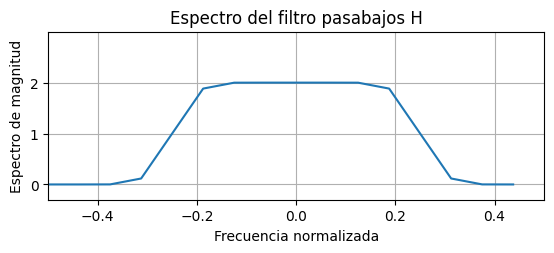

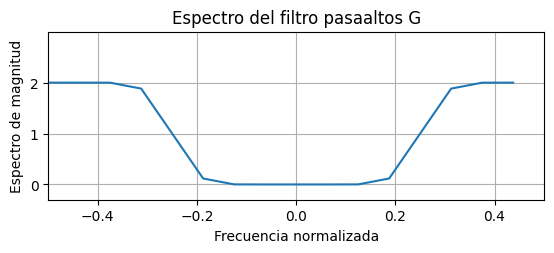

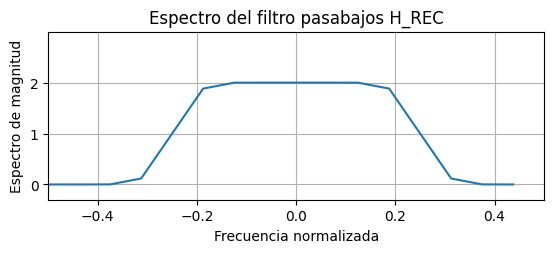

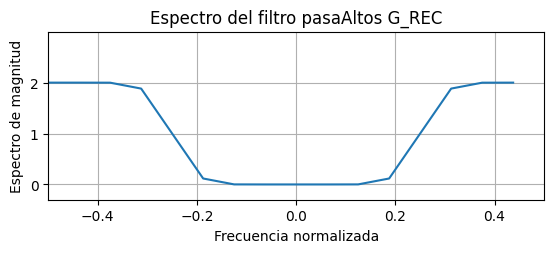

In [37]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# %>>>            filtros                  <<<%
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

h = np.array([-1.1748e-04,   6.7545e-04,  -3.9174e-04,  -4.8704e-03,   8.7461e-03,   1.3981e-02,  -4.4088e-02,
-1.7369e-02,   1.2875e-01,   4.7248e-04,  -2.8402e-01,  -1.5829e-02,   5.8535e-01,   6.7563e-01, 3.1287e-01,   5.4416e-02 ])

g = np.array([ -5.4416e-02,   3.1287e-01,  -6.7563e-01,   5.8535e-01,   1.5829e-02,  -2.8402e-01,  -4.7248e-04,
1.2875e-01,  1.7369e-02,  -4.4088e-02,   -1.3981e-02,   8.7461e-03,   4.8704e-03,  -3.9174e-04, -6.7545e-04,  -1.1748e-04 ])

h_rec = np.array([ 5.4416e-02,   3.1287e-01,   6.7563e-01,   5.8535e-01,  -1.5829e-02,  -2.8402e-01,   4.7248e-04,
1.2875e-01,  -1.7369e-02,  -4.4088e-02,   1.3981e-02,   8.7461e-03,  -4.8704e-03,  -3.9174e-04, 6.7545e-04,  -1.1748e-04 ])

g_rec = np.array([ -1.1748e-04,  -6.7545e-04,  -3.9174e-04,   4.8704e-03,   8.7461e-03,  -1.3981e-02,  -4.4088e-02,
1.7369e-02,   1.2875e-01,  -4.7248e-04,   -2.8402e-01,   1.5829e-02,   5.8535e-01,  -6.7563e-01, 3.1287e-01,  -5.4416e-02 ])

#Calculamos DFFT de cada uno
espectro_h = np.fft.fftshift(np.fft.fft(h)) 
espectro_g = np.fft.fftshift(np.fft.fft(g))
espectro_h_rec = np.fft.fftshift(np.fft.fft(h_rec))
espectro_g_rec = np.fft.fftshift(np.fft.fft(g_rec))
NumSamples= len(h)
freq = (np.arange(NumSamples) - NumSamples/2) * 1/ NumSamples #Asumimos frecuencia normalizada
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO H 
plt.figure(1)
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(espectro_h)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasabajos H")
plt.ylim([-0.3,np.max(np.abs(espectro_h)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.grid()
plt.show()
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO G
plt.figure(2)
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(espectro_g)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasaaltos G")
plt.ylim([-0.3,np.max(np.abs(espectro_g)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.grid()
plt.show()
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO H_REC 
plt.figure(3)
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(espectro_h_rec)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasabajos H_REC")
plt.ylim([-0.3,np.max(np.abs(espectro_h_rec)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.grid()
plt.show()
#-------------OBTENEMOS ESPECTRO Y PLOTEAMOS USANDO FRECUENCIA NORMALIZADA DE FILTRO G_REC
plt.figure(4)
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(espectro_g_rec)**2)
plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro del filtro pasaAltos G_REC")
plt.ylim([-0.3,np.max(np.abs(espectro_g_rec)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.grid()
plt.show()

Comentarios: Al calcular la transformada de fourier de cada arreglo proporcionado podemos confirmar que H y H_rec correspondían a un filtro pasabajos y los otros a pasaltos. Se plotearon los espectros de magnitud de cada uno de los filtros y se podría estimar  que los filtros aperan con una frecuencia de corte (normalizada respecto de fs) igual a 0.15 aproximadamente (tanto para LPF como HPF) . La frecuencia de corte representa la frecuencia para la cual se empiezan a dejar pasar componentes espectrales (HPF) o la frecuencia hasta donde se dejan pasar componentes (LPF).     Si bien las 


c) (1 pto.) Convolucione la se˜nal de entrada con los filtros h y g: XL = X∗h,
XH = X∗g, mantener el n´umero de muestras de la se˜nal original. Grafique
el espectro de ambas se˜nales y comentar.


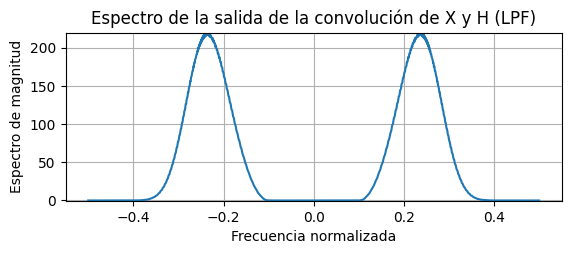

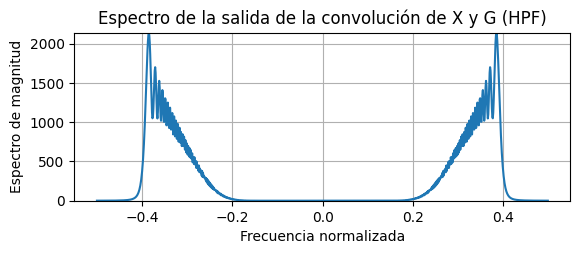

In [38]:
#Usamos funciones predeterminadas para realizar la convolución 
#---------------CASO LOW PASS FILTER
XL = np.convolve(signal,h , 'same')#Calculamos la convolución
EspectroXLow = np.fft.fftshift(np.fft.fft(XL))
Ns =  len(XL)
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/fs #Frecuencia normalizada
#Espectro de la convolución con el LPF - Filtro H
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(freq , np.abs(EspectroXLow)**2)
#plt.xlim([-0.5,0.5])
plt.grid()
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de la salida de la convolución de X y H (LPF)")
plt.ylim([-0.3,np.max(np.abs(EspectroXLow)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.show()
#---------CASO HIGH PASS FILTER
XH = np.convolve(signal,g,'same')#Calculamos la convolución
EspectroXHigh = np.fft.fftshift(np.fft.fft(XH))
Ns =  len(XH)
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)*(1/fs) #Frecuencia normalizada
#Espectro de la convolución con el LPF - Filtro H
plt.figure(2)
plt.subplot(2, 1, 2)
plt.plot(freq , np.abs(EspectroXHigh)**2)
#plt.xlim([-0.5,0.5])
plt.xlabel("Frecuencia normalizada")
plt.title("Espectro de la salida de la convolución de X y G (HPF)")
plt.ylim([-0.3,np.max(np.abs(EspectroXHigh)**2)+1])
plt.ylabel("Espectro de magnitud")
plt.grid()
plt.show() 

Como se sabe la convolución en el dominio del tiempo es una multiplicación en el dominio de la frecuencia ; por lo tanto , podemos ver como en el caso del LPF a la salida, predominan las componentes frecuenciales menores y se atenua demasiado en comparación a la original a partir de la frecuencia de corte del pasabajos . Se ve el caso contrario para el pasaaltos porque en ese caso sí sobreviven las componentes de frecuencias más altas y las de bajas frecuencias son bastante atenuadas. Cabe resaltar que si bien el orden de los valores discretos en el filtro estan invertidos respecto al original en caso de los _rec , su espectro en frecuencia es igual , esto se debe a que la inversión en el tiempo tmb produce una inversion en frecuencia pero al ser una señal real , su espectro será par y se verá igual. 


d) (1 pto.) Submuestree (downsampling) con factor 2 las se˜nales XL y XH.
(XLDN = downsampling(XL) y XHDN = downsampling(XH)). Grafique el
espectro de cada una de ellas y comentar.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


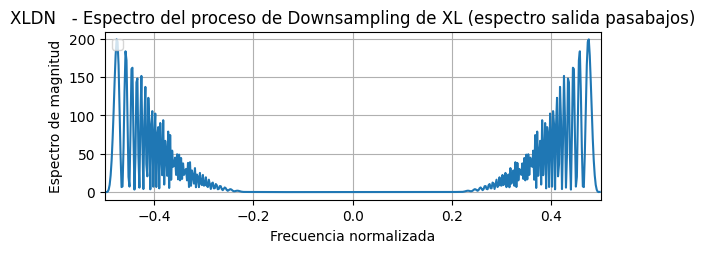

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


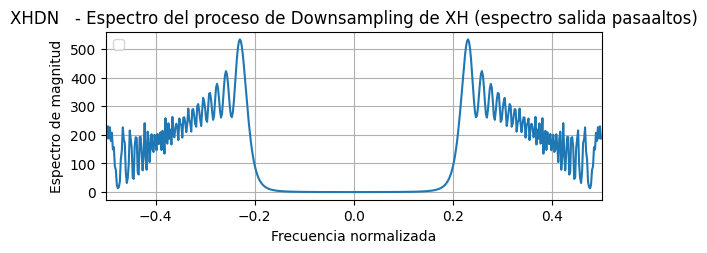

In [39]:
#Upsampling comprime espectro 
#Downsampling lo ensancha pero pero comprime 
#--------Realizamos Downsampling ------------ con factor de 2 a  XL 
#Reducimos muestras
Ns = len(XL)
D = 2
Ns_dn = Ns/D    
fs_dn = fs/D
n_dn = np.arange(Ns_dn)
XLDN = XL[::D]
t_dn = n_dn/fs_dn
#Obtenemos la transformada de fourier  
espectro_XLDN = np.fft.fftshift(np.fft.fft(XLDN))
spc_dn = np.abs(espectro_XLDN)**2
freq_dn = ((n_dn - Ns_dn/2) * fs / Ns_dn )/fs

#Ahora ploteamos 
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(freq_dn,spc_dn)
plt.xlim([-1/2 , 1/2])
plt.title("XLDN   - Espectro del proceso de Downsampling de XL (espectro salida pasabajos)")
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Espectro de magnitud')
plt.legend(loc='upper left')
plt.show()
#--------Realizamos Downsampling ------------ con factor de 2 a  XH
#Reducimos muestras
Ns = len(XH)
D = 2
Ns_dn = Ns/D
fs_dn = fs/D
n_dn = np.arange(Ns_dn)
XHDN = XH[::D]
t_dn = n_dn/fs_dn
#Obtenemos la transformada de fourier  
espectro_XHDN = np.fft.fftshift(np.fft.fft(XHDN))
spc_dn = np.abs(espectro_XHDN)**2
freq_dn = ((n_dn - Ns_dn/2) * fs / Ns_dn )/fs
#Ahora ploteamos 
plt.figure(2)
plt.subplot(2, 1, 1)
plt.xlim([-1/2 , 1/2])
plt.plot(freq_dn,spc_dn)
plt.title("XHDN   - Espectro del proceso de Downsampling de XH (espectro salida pasaaltos)")
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Espectro de magnitud')
plt.legend(loc='upper left')
plt.show()

En este caso podemos ver el efecto del ensanchamiento del downsampling , en el primer caso se nota como se escala el espectro original , existe una tendencia en su comportamiento. Mientras , en el caso de XHDN ocurre aliasing por ensanchamiento en downsampling. El espectro se ensancha tanto que el se traslapa con la copia de su espectro ; por eso podemos ver un comportamiento fuertemente creciente al inicio que corresponde al pico del espectro contiguo (Antes iba de 0.1 a 0.4 ahora irá de 0.2 a 0.8 , provocando aliasing). Esto es congruente ya que a mayores componentes frecuenciales se tendrán más probabilidades de producir aliasing por ensanchar de más el espectro. 

e) (1 pto.) Realice un upsampling (factor 2) de las se˜nales que previamente
han pasado por el submuestreo. (YLUP = upsampling(XLDN) y YHUP =
upsampling(XHDN)). Grafique el espectro de cada una de ellas y comentar.


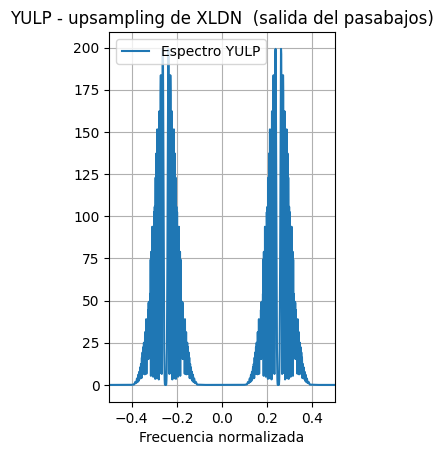

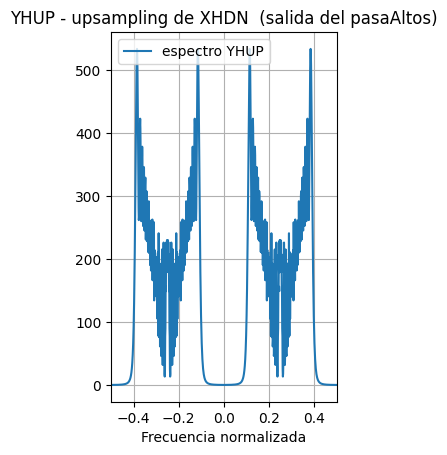

In [40]:
#Realizamos upsampling a ambos con el factor de 2 
Ns = len(XLDN)
U = 2
n = np.arange(Ns)
Ns_up = U*Ns
fs_up = U*fs_dn
YULP = np.zeros([Ns_up])
YULP[U*n] = XLDN[:]
t_up = np.arange(Ns_up)/fs_up

#Ahoraa hallamos su FFT 
espectro_YULP = np.fft.fftshift(np.fft.fft(YULP))
spc_up = np.abs(espectro_YULP)**2
freq_up = ((np.arange(Ns_up) - Ns_up/2) * fs / Ns_up ) /fs

plt.figure(1)
plt.subplot(1,2,1)
plt.plot(freq_up,spc_up,label='Espectro YULP')
plt.xlim([-1/2,1/2])
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.legend(loc='upper left')
plt.title("YULP - upsampling de XLDN  (salida del pasabajos)")
plt.show()

#Realizamos upsampling a ambos con el factor de 2 
Ns = len(XHDN)
U = 2
n = np.arange(Ns)
Ns_up = U*Ns
fs_up = U*fs_dn
YHUP = np.zeros([Ns_up])
YHUP[U*n] = XHDN[:]
t_up = np.arange(Ns_up)/fs_up

#Ahoraa hallamos su FFT 
espectro_YHUP = np.fft.fftshift(np.fft.fft(YHUP))
spc_up = np.abs(espectro_YHUP)**2
freq_up = ((np.arange(Ns_up) - Ns_up/2) * fs / Ns_up ) /fs

plt.figure(1)
plt.subplot(1,2,2)
plt.title("YHUP - upsampling de XHDN  (salida del pasaAltos)")
plt.plot(freq_up,spc_up,label='espectro YHUP')
plt.xlim([-1/2,1/2])
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.legend(loc='upper left')
plt.show()

Al aplicar el proceso de upsampling , el espectro se contrae  de tal forma que al normalizar respecto a la frecuencia de muestreo inicial se pueden ver varias copias del espectro más juntaas.  Se puede apreciar como las componentes de frecuenciales altas (que antes producieron aliasing) lograron retomar su posición inicial respecto a frecuencia y como las componentes de baja frecuencia también aunque estas fueron de cierta forma replicadas dado el proceso de compactación de upsampling.


f) (1 pto.) Generar filtros hrec y grec (ver programa lab1.py). Convolucione
las se˜nales que previamente han pasado por la operaci´on de upsampling
con los filtros hrec y grec. YL = YLUP ∗ hrec, YH = YHUP ∗ grec, mantener el
n´umero de muestras de

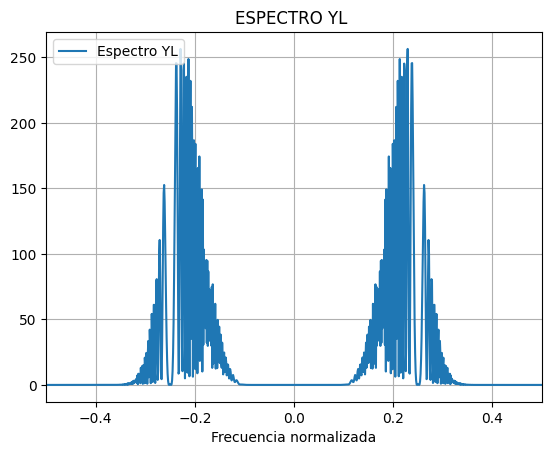

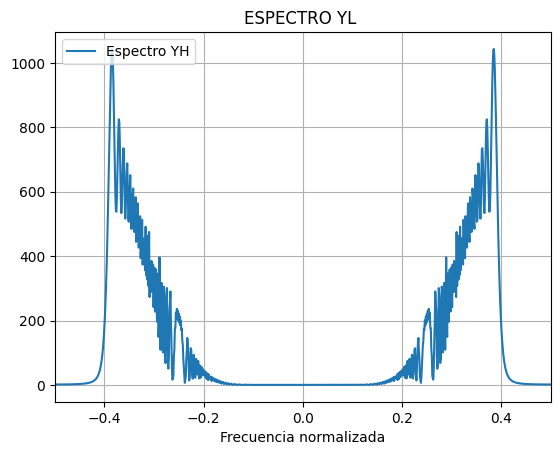

In [45]:

YL = np.convolve(YULP, h_rec ,'same') # El resultado de la convolución tendrá el mismo length que la señal de inicio
YH = np.convolve(YHUP,g_rec , 'same')

#Espectro YL 
Ns = len(YL)
espectro_YL =  np.fft.fftshift(np.fft.fft(YL))
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/fs #Graficamos normalizando

plt.figure(1)
plt.plot(freq,np.abs(espectro_YL)**2,label='Espectro YL')
#plt.xlim([-fs/2,fs/2])
plt.title("ESPECTRO YL ")
plt.xlim([-1/2,1/2])
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.legend(loc='upper left')
plt.show()

#Espectro YH 
Ns=  len(YH)
espectro_YH =  np.fft.fftshift(np.fft.fft(YH))
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/fs #Graficamos normalizando

plt.figure(2)
plt.plot(freq,np.abs(espectro_YH)**2,label='Espectro YH')
#plt.xlim([-fs/2,fs/2])
plt.xlim([-1/2,1/2])
plt.title("ESPECTRO YL ")
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.legend(loc='upper left')
plt.show()


Al aplicar el filtro de recuperación , usando el pasaaltos para el caso donde el aliasing había afectado fuertemente a las muestras iniciales se lográn recuperar la parte del espectro que predomino en ese proceso de aliasing que justamente afecto a una zona espectral de baja potencia por lo que en realidad si conservamos la información y al aplicar upsampling se "reacomodo" en su lugar inicial con copias , aplicamos el filtro y recuperamos ese caso inicial . 

De formaa similar sucede con el caso del espectro YL , que pudo recuperar su forma , al aplicar el pasabajos en la zona espectral que desde un inicio aun conservaba bien sus magnitudes correctas (con menos error q en el caso con aliasing).

g) (1 pto.) Compare la se˜nal Y = YL +YH y comp´arela con la se˜nal original.
Graficar en el tiempo y frecuencia, comentar sus resultados.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


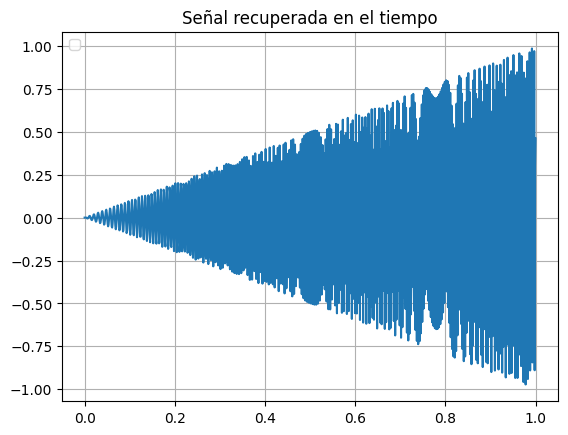

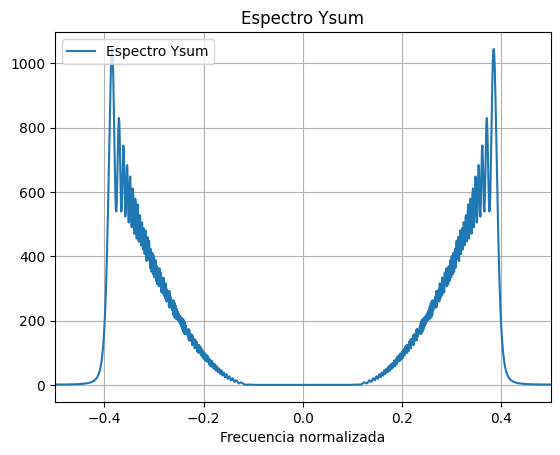

Media de error : 0.0008686503609283806


In [46]:
Ysum =  YL + YH 
#Ploteamos en el tiempo

plt.figure(1)
plt.plot(np.linspace(0,1,Ns),Ysum)
#plt.xlim([-fs/2,fs/2])
plt.title("Señal recuperada en el tiempo")
plt.grid('on')
plt.legend(loc='upper left')
plt.show()




Ns=  len(Ysum)
espectro_Ysum =  np.fft.fftshift(np.fft.fft(Ysum))
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns)/fs #Graficamos normalizando

#Ploteamos en frecuencia 
plt.figure(2)
plt.plot(freq,np.abs(espectro_Ysum)**2,label='Espectro Ysum')
#plt.xlim([-fs/2,fs/2])
plt.xlim([-1/2,1/2])
plt.title("Espectro Ysum")
plt.grid('on')
plt.xlabel('Frecuencia normalizada')
plt.legend(loc='upper left')
plt.show()




array = Ysum-signal #Tenemos que alterar las muestras porque 
print(f"Media de error : {np.mean(array)}")

Como se explico antes, se lograron recuperar las formas de los espectro iniciales que fueron afectados por los HPF y LPF , al sumar ambos espectro se recuperaron aproximadamente la forma inicial del espectro , el motivo por el cual no se asemeja completamente (existe error) a la señal es por el uso de filtros caidas de atenuación suave lo que provoca que en las componentes frecuenciales cerca a la frecuenncia de corte hayan variaciones significativas en las magnitudes. De todas maneras como se demuestra con los gráficos se logró recuperar la señal original , con bajo error . Usando las técnicas y procesos descritos en las otras preguntas.

Pregunta 2 (4 ptos.):
Se busca realizar la decimaci´on con factor 2 (reducir a la mitad la frecuencia
de muestreo) de una se˜nal de audio. La se˜nal se encuentra corrompida por tono
sinusuidal en una frecuencia mayor a la que se˜nal de audio original se encuentra,
para ello se realizar´a lo siguiente:

a) (Tarea as´ıncrona) Leer el archivo audio.wav, identificar la frecuencia de
muestreo y en base a ello generar un vector de tiempos. Graficar la se˜nal
en el tiempo y su espectro en frecuencia en Hz.

In [48]:
from scipy.io import wavfile

La frecuencia de muestreo usada en el audio es de :  3000 Hz


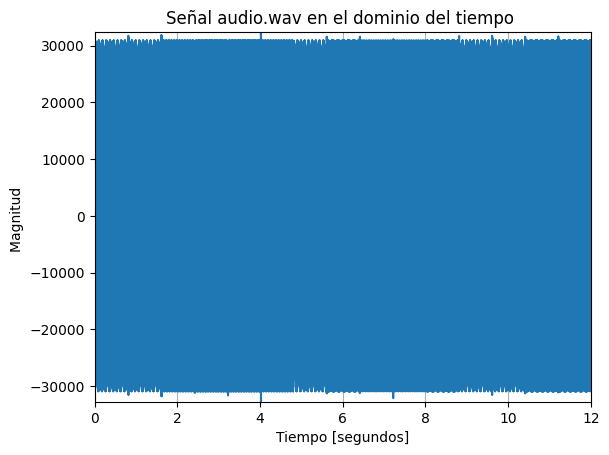

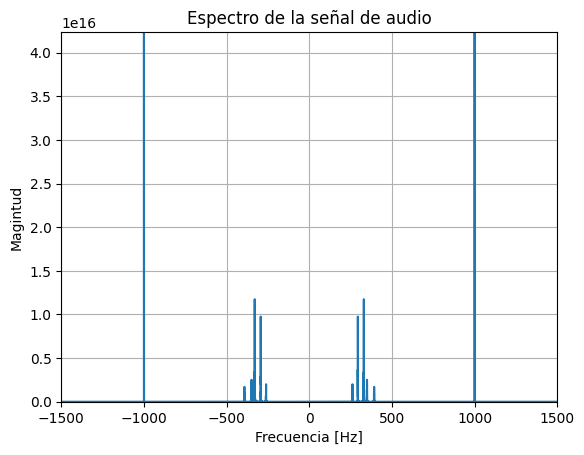

In [49]:
fs, y_t = wavfile.read('audio.wav') #Extraemos la frecuencia de muestreo (metadata) y los valores del arreglo
print(f"La frecuencia de muestreo usada en el audio es de :  { fs} Hz")
time_array = np.arange(len(y_t))/fs #Arreglo de tiempos
Ns = len(y_t)
#---------------PLOTEAMOS LA SEÑAL EN EL TIEMPO-------------
plt.figure(1)
plt.plot( time_array, y_t)
plt.title("Señal audio.wav en el dominio del tiempo ")
plt.xlim([0,12])
plt.ylim([np.min(y_t)  ,  np.max(y_t)])
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Magnitud ")
plt.grid("on")
plt.show()
#--------------OBTENEMOS EL ESPECTRO Y PLOTEAMOS-----------
fft_yt = np.fft.fftshift(np.fft.fft(y_t)) #Hallamos la transformada de fourier
esp = np.abs(fft_yt)**2 #Calculamos el cuadrado de la magnitud 
freq = ((np.arange(Ns) - Ns/2) * fs/ Ns) #Graficamos normalizando
plt.figure(2)
plt.plot( freq, esp)
plt.title("Espectro de la señal de audio")
plt.xlim([-0.5*fs , 0.5*fs]) #Frecuencia normalizada
plt.ylim([np.min(esp)  ,  np.max(esp)])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magintud")
plt.grid("on")
plt.show()

Comentario:  Al plotear las gráficas en el dominio del tiempo podemos observar la duración del audio y todas las magnitudes que toma a lo largo del tiempo, Al escuchar la canción se puede estipular apriori que dicha señal está compuesta en su mayoría por tonos. Normalmente las piezas musicales de piano son tonos de una u otra forma . Luego esto se confirma al ver el espectro de la señal donde vemos que el espectro está compuestp en su mayoría por impulsos  (tonos) .Podemos ver que hay un tono predominante a los 1000 Hz (muy distante de la mayoría que se encuentran concentrados más cerca al centro del espectro).

b) (1 pto.) Hallar las frecuencias en las cuales se encuentra el audio original
y la frecuencia espec´ıfica del tono sinusoidal.


c) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando solo downsampling. Graficar el espectro en frecuencia
en Hz y guardar la se˜nal generada.


d) (1 pto.) Realizar el proceso de resampleo a la mitad de la frecuencia de
muestreo aplicando decimaci´on, es decir aplicar un filtro pasa bajos ideal
y luego efectuar el downsampling. Graficar el espectro en frecuencia en Hz
y guardar la se˜nal generada.


e) (1 pto.) ¿C´omo se compararan ambos caso? ¿Cu´al m´etodo recupera adecuadamente
la se˜nal original y cual produce aliasing? Explicar el por qu´e
en ambos casos.